In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
raw_df = pd.read_csv("zeta.csv")
raw_df.head()

,Unnamed: 0,zcta,sex,meanage,meaneducation,meanemployment,meanhouseholdincome
0,1,602,F,37.403347,10.912822,0.740029,18533.844
1,2,602,M,35.935740,10.692618,1.343883,18533.844
2,3,604,F,31.809427,13.913371,1.085855,40784.491
3,4,604,M,31.104254,14.264654,1.602559,40784.491
4,5,606,F,35.990794,10.097773,0.628753,17496.526


In [3]:
df = raw_df.drop_duplicates("meanhouseholdincome")
df = df.drop(columns=["zcta","sex"])
# 8 < meaneducation < 18 ; 10,000 < meanhouseholdincome < 200,000 ; 0 < meanemployment < 3 ; 20 < meanage < 60
filter = (df["meaneducation"] > 8) & (df["meaneducation"] < 18)
filter = filter & (df["meanhouseholdincome"] > 10000) & (df["meanhouseholdincome"] < 200000)
filter = filter & (df["meanemployment"] > 0) & (df["meanemployment"] < 3)
filter = filter & (df["meanage"] > 20) & (df["meanage"] < 60)
df = df[filter]
df.head()

,Unnamed: 0,meanage,meaneducation,meanemployment,meanhouseholdincome
0,1,37.403347,10.912822,0.740029,18533.844
2,3,31.809427,13.913371,1.085855,40784.491
4,5,35.990794,10.097773,0.628753,17496.526
6,7,37.260141,10.969157,0.854325,19416.410
8,9,40.427321,11.575772,0.781539,21607.340


In [4]:
df["log_income"] = np.log10(df["meanhouseholdincome"])
df = df.rename(columns={"meaneducation": "education", "meanage": "age", "meanemployment": "employment"})

<Axes: xlabel='age', ylabel='log_income'>

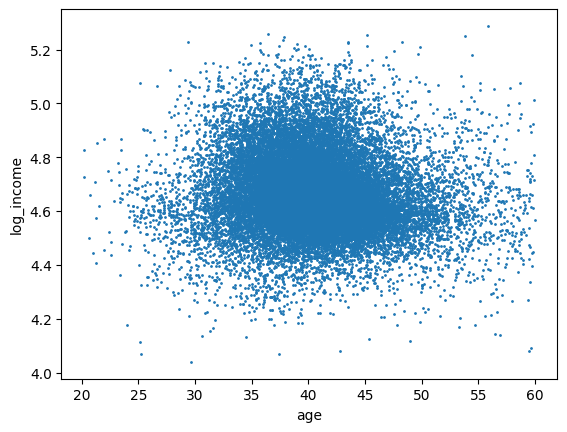

In [5]:
df.plot.scatter('age', 'log_income', 1)

In [6]:
X, y = np.array(df['age']).reshape(-1, 1), np.array(df['log_income']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
#sk.metrics.classification_report(y_test, reg.predict(X_test))
print("t-value: ", metrics.mean_absolute_error(y_test, y_pred))
print("R-squared: ", metrics.r2_score(y_test, y_pred))

t-value:  0.10318894902889111
R-squared:  0.013626746036586534


<Axes: xlabel='education', ylabel='log_income'>

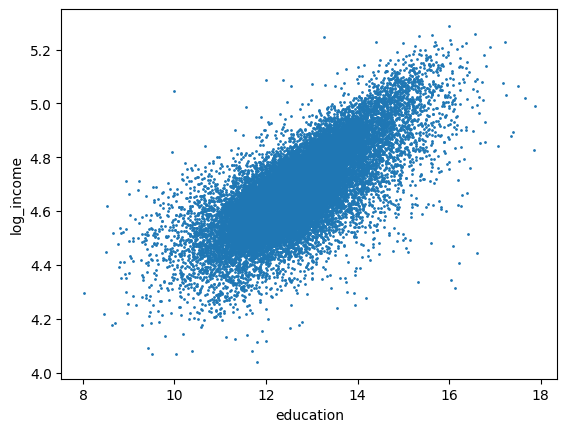

In [7]:
df.plot.scatter('education', 'log_income', 1)

In [8]:
X, y = np.array(df['education']).reshape(-1, 1), np.array(df['log_income']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
#sk.metrics.classification_report(y_test, reg.predict(X_test))
print("t-value: ", metrics.mean_absolute_error(y_test, y_pred))
print("R-squared: ", metrics.r2_score(y_test, y_pred))

t-value:  0.07024687361874314
R-squared:  0.5402293154793807


<Axes: xlabel='employment', ylabel='log_income'>

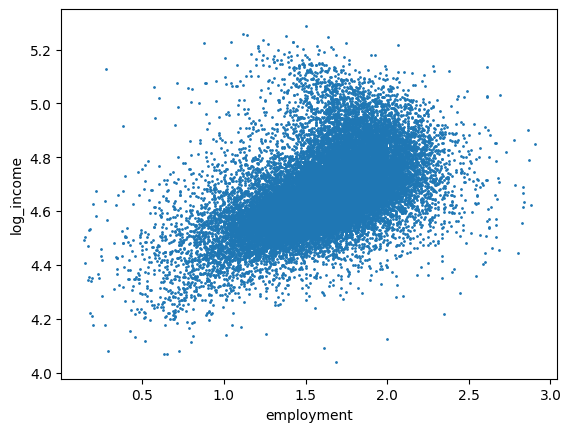

In [9]:
df.plot.scatter('employment', 'log_income', 1)

In [10]:
X, y = np.array(df[['age', 'education', 'employment']]).reshape(-1, 3), np.array(df['log_income']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
#sk.metrics.classification_report(y_test, reg.predict(X_test))
print("t-value: ", metrics.mean_absolute_error(y_test, y_pred))
print("R-squared: ", metrics.r2_score(y_test, y_pred))

t-value:  0.06663475461910648
R-squared:  0.5772750970659151


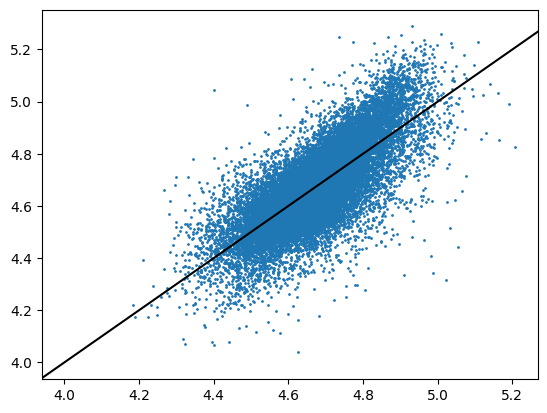

In [11]:
y_pred = reg.predict(X)
plot.scatter(y_pred, y, 1)
plot.axline((4, 4), slope=1, color="black")